# Martha Herrera's Project 2C – Draft

## Introduction
#### Scientific Question:Is it possible to predict and further prevent the next influenza epidemic by looking at seasonal flu strains (that have a potential to become pandemic) genomic profile and features, and comparing them to those of previous pandemic flu strains?
The 1918 Influenza Flu was one of the most fatal pandemics recorded to date. It is estimated that at least 50 to 100 million people died worldwide and about one third of the world's population at the time became infected. Since then, scientists have been waiting for the next big influenza pandemic. Although a series of influenza pandemics have arised since then, the death tolls never reached the peak that the 1918 flu had. Comparing the big pandemic strain as a model to any other current circulating strains to the genomic and molecular level can provide more information and hopefully better predictions to prevent another big tragedy.


### Hypothesis: If big deadly Influenza epidemics have happened around every 10-40 years, and the last epidemic was 2009 H1N1 epidemic, then the 1918 influenza strain will have extremely similar or identical HA and NA glycoprotein features to the 2009 strain, which in turn are more genetically related to the current seasonal influenza strains.
-Mention what NA and HA are, and how important they are to influenza infection

-include where data was sourced from (NCBI, PDB)

-mention how sequencing data was aligned with the use of https://www.ebi.ac.uk/Tools/msa/clustalo/

## Loading in Packages

#### Definitions
include here definitions of packages and analysis methods

#### Modules and packages needed for multiple sequence alignment method

In [7]:
conda install -c conda-forge biotite

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
conda install -c bioconda mafft

Solving environment: done

## Package Plan ##

  environment location: /Users/martizzle/opt/anaconda3

  added / updated specs:
    - mafft


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2022.5.18.1-py39~ --> pkgs/main::certifi-2022.5.18.1-py39hecd8cb5_0
  openssl            conda-forge::openssl-1.1.1o-hfe4f2af_0 --> pkgs/main::openssl-1.1.1o-hca72f7f_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [9]:
import sys
from Bio import SeqIO
from Bio.Align.Applications import MafftCommandline
import tempfile

#### Modules and packages needed for Homology Modeling & Structural Bioinformatics

In [26]:
conda config --add channels salilab


Note: you may need to restart the kernel to use updated packages.


In [27]:
conda install modeller

Solving environment: done

## Package Plan ##

  environment location: /Users/martizzle/opt/anaconda3

  added / updated specs:
    - modeller


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    hdf5-1106-1.10.6           |                0         2.8 MB  salilab
    modeller-10.1              |           py39_1        28.9 MB  salilab
    ------------------------------------------------------------
                                           Total:        31.6 MB

The following NEW packages will be INSTALLED:

  hdf5-1106          salilab/osx-64::hdf5-1106-1.10.6-0
  modeller           salilab/osx-64::modeller-10.1-py39_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2022.5.18.1-py39~ --> pkgs/main::certifi-2022.5.18.1-py39hecd8cb5_0
  openssl            conda-forge::openssl-1.1.1o-hfe4f2af_0 --> pkgs/main::openssl-1.1.

#### Modules and packages needed for 3D Protein measurements

In [12]:
import nglview
import numpy
from Bio.PDB.PDBParser import PDBParser

#### Modules and packages needed for Phylogenetic clustering

In [12]:
import Bio
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

## NCBI – Multiple Sequence Alignment

** need to add comments indicating each step and don't forget to define your variables!

** figure out how to save your output as a txt file or mention how you had to use a website to align them to obtain file

#### Hemagglutinin (HA) Sequence Alignments

In [13]:
#multiple sequence alignment for HA gene sequence
HA = "HA"
reference = 0
count = 0
with tempfile.NamedTemporaryFile() as temp:
    for record in SeqIO.parse(HA, "fasta"):
        if count == 0:
            reference = record
        else:
            SeqIO.write([reference, record], temp.name, "fasta")
            mafft_cline = MafftCommandline(input=temp.name)
            stdout,stderr=mafft_cline()
            print(stdout)
        count += 1
        print('\n')



>AF117241.1 Influenza A virus (A/South Carolina/1/18 (H1N1)) hemagglutinin gene, complete cds
atggaggcaagactactggtcttgttatgtgca---------------------------
---------------tttgcagctacaaatgcagacacaatatgtataggctaccatgcg
aataactcaaccgacactgttgacacagtactcgaaaagaatgtgaccgtgacacactct
gttaacctgctcgaagacagccacaacggaaaactatgtaaattaaaaggaatagcccca
ttacaattggggaaatgtaatatcgccggatggctcttgggaaacccggaatgcgattta
ctgctcacagcgagctcatggtcctatattgtagaaacatcgaactcagagaatggaaca
tgttacccaggagatttcatcgactatgaagaactgagggagcaattgagctcagtgtca
tcgtttgaaaaattcgaaatatttcccaagacaagctcgtggcccaatcatgaaacaacc
aaaggtgtaacggcagcatgctcctatgcgggagcaagcag------tttttacagaaat
ttgctgtggctgacaaagaagggaagctcatacccaaagcttagcaagtcctatgtgaac
aataaagggaaagaagtccttgtactatggggtgttcatcatccgcctaccggtactgat
caacagagtctctatcagaatgcagatgcttatgtctctgtagggtcatcaaaatataac
aggagattcaccccggaaatagcagcgagacccaaagtaagagatcaagctgggaggatg
aactattactggacattactagaacccggagacacaataacatttgaggcaactggaaat
ctaatagcaccatggtatgctttcgcactgaatagaggttctggatccgg

#### Neuraminidase (NA) Sequence Alignments

In [14]:
#multiple sequence alignment for NA gene sequence
NA = "NA"
reference = 0
count = 0
with tempfile.NamedTemporaryFile() as temp:
    for record in SeqIO.parse(NA, "fasta"):
        if count == 0:
            reference = record
        else:
            SeqIO.write([reference, record], temp.name, "fasta")
            mafft_cline = MafftCommandline(input=temp.name)
            stdout,stderr=mafft_cline()
            print(stdout)
        count += 1
        print('\n')



>U94893.1 Influenza A virus (A/South Carolina/1/18 (H1N1)) neuraminidase gene, partial cds
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
----------------------------gtcaatctgta---------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
---------------tggtagtcggaata-------------------------------
------------------------------------------------------------
------------attagcctaatatt----------------------------------
-----------------------------------------------------

## PDB – Homology Modeling and Structural Bioinformatics

!curl https://urldefense.proofpoint.com/v2/url?u=https-3A__salilab.org_modeller_downloads_pdb-5F95.pir.gz&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=XK4k89MR9rKQ57eNQvyPIkgLorH2PxP8QB_VSr9lqxs&m=lsV1GQVOohT4tu53SxHIxHbU9FhJoiqAo8tAj_2HjAH-CbkQb00PiSDmstzcLbl1&s=_qTBMlB3SdEnBuuLFNcCvsHYdpOSVOncxINylIDJflk&e=  -o pdb_95.pir.gz

## 3D Protein Measurements

*define variables, comment out each step

#### 3D NA Structures

In [4]:
#1918 NA PDB display
view = nglview.show_pdbid("3BEQ")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

In [5]:
#2009 H1N1 NA PDB display
view = nglview.show_pdbid("3NSS")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

In [10]:
#H2N2 NA PDB display
view = nglview.show_pdbid("3TIA")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

In [18]:
#H3N2 NA PDB display
view = nglview.show_pdbid("4GZT")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

#### 3D measurements NA

In [14]:
#1918 H1N1
parser = PDBParser()
structure = parser.get_structure("3BEQ", "3BEQ.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[  1.396  45.884 -12.955] - [ 2.978 44.669 -9.723] = 3.7979962825775146


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6573.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6637.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6677.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7074.
  warnings.warn(


In [15]:
#2009 H1N1
parser = PDBParser()
structure = parser.get_structure("3NSS", "3NSS.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[13.284 45.427 27.397] - [16.946 46.422 27.707] = 3.8074092864990234


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12690.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12748.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12816.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13730.
  warnings.warn(


In [16]:
#H2N2
parser = PDBParser()
structure = parser.get_structure("3TIA", "3TIA.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[15.781 15.689  5.877] - [16.952 18.702  3.869] = 3.805452585220337


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25863.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25913.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25991.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26041.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26091.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBC

In [19]:
#H3N2
parser = PDBParser()
structure = parser.get_structure("4GZT", "4GZT.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[43.234 42.732 25.352] - [44.146 39.022 25.277] = 3.82118558883667


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13279.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13329.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13392.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13427.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13476.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBC

#### 3D HA Structures

In [20]:
#1918 HA PDB display
view = nglview.show_pdbid("3GBN")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

In [21]:
#2009 HA PDB display
view = nglview.show_pdbid("3LZG")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

In [7]:
#H2N2 (1957 strain) HA PDB display
view = nglview.show_pdbid("3KU6")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

In [9]:
#H3N2 (1973 seasonal strain) HA PDB display
view = nglview.show_pdbid("4WE5")
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

#### HA 3D Measurements

In [22]:
#1918 H1N1
parser = PDBParser()
structure = parser.get_structure("3GBN", "3GBN.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[-82.902  -1.797  -4.32 ] - [-83.23    0.344  -6.323] = 2.950165271759033


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7632.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7662.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7709.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7713.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7795.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstr

In [23]:
#2009 H1N1
parser = PDBParser()
structure = parser.get_structure("3LZG", "3LZG.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[-20.541  43.585 -67.855] - [-18.857  44.085 -64.472] = 3.8118979930877686


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 48331.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 48359.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 48387.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 48456.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 48488.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBC

In [24]:
#H2N2
parser = PDBParser()
structure = parser.get_structure("3KU6", "3KU6.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[-11.701 -26.026  47.188] - [ -8.401 -24.188  46.502] = 3.8391196727752686


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4493.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4511.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4518.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4962.
  warnings.warn(


In [25]:
#H3N2
parser = PDBParser()
structure = parser.get_structure("4WE5", "4WE5.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[-27.684 -62.485 -67.983] - [-29.188 -59.164 -66.993] = 3.777719259262085


/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8571.
  warnings.warn(
/Users/martizzle/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8845.
  warnings.warn(


#### Hemagglutinin (HA) Sequence Logo

In [15]:
fin = open('HA_align.txt')
seqs = read_seq_data(fin)
logodata = LogoData.from_seqs(seqs)
logooptions = LogoOptions()
logooptions.title = "HA"
logoformat = LogoFormat(logodata, logooptions)
eps = eps_formatter(logodata, logoformat)  

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import logomaker as lm

In [25]:
with lm.open_example_datafile('HA_align.txt', print_description=False) as f:
    raw_seqs = f.readlines()
raw_seqs[10:20]

LogomakerError: Matrix "HA_align.txt" not recognized. Please choose from: 
'ss_sequences.txt'
'ww_sequences.fa'
'crp_sites.fa'
'nn_saliency_values.txt'
'ars_wt_sequence.txt'
'ars_sequences.txt.gz'

## Phylogenetic Clustering

*add description of method

*add details to tree figure such as title and see if you can change the accension numbers to the influenza strain type and the year it was isolated from (H1N1 1918, H1N1 2009, etc)

#### Hemagglutinin (HA) tree

Alignment with 5 rows and 1797 columns
--------------TAATTCTATTAATCATGAAGACCATCATTG...--- CY147438.1
-----------GGATAATTCTATTAACCATGAAGACTATCATTG...--- ON371590.1
AGCAAAAGCAGGGGTTATACCATAGACAACCAAAAGCATAACAA...TGA L11133.1
-------------------------------------ATGGAGG...--- AF117241.1
--------------GGAAAACAAAAGCAACAA---AAATGAAGG...--- GU433033.1
CY147438.1	0
ON371590.1	0.15470228158041177	0
L11133.1	0.516972732331664	0.521981079577073	0
AF117241.1	0.5080690038953812	0.5097384529771842	0.37840845854201444	0
GU433033.1	0.5080690038953812	0.5230940456316082	0.38341680578742343	0.20144685587089595	0
	CY147438.1	ON371590.1	L11133.1	AF117241.1	GU433033.1


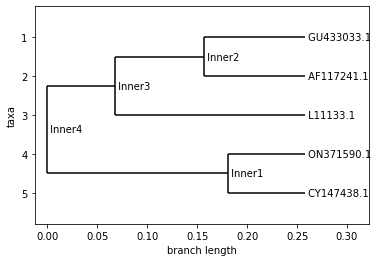

In [36]:
#read and align query sequences from the file "CoV_S_seqs.fasta" and name the alignment result as "align"
align = AlignIO.read("HA_align.txt", "fasta")

#print out the alignment result
print(align)

#calculate the distance matrix using DistanceCalculator and name as "distMatrix"
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)

#print out distance matrix result
print(distMatrix)

#create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

#Construct the phylogenetic tree using UPGMA algorithm
Tree = constructor.upgma(distMatrix)

#Draw the phylogenetic tree with phylo.draw() function
Phylo.draw(Tree)

#### Neuraminidase (NA) tree

Alignment with 5 rows and 1463 columns
-AGTAAAGATGAATCCAAATCAAAAGATAATAACGATTGGCTCT...ACT ON371592.1
--------ATGAATCCAAATCAAAAGATAATAACAATTGGCTCT...--- AY209932.1
-AGTGAAAATGAATCCAAATCAAAAGATAATAACAATTGGCTCT...ACT CY147440.1
----------------------------------------GTCA...--- U94893.1
AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTCG...ACT GU433035.1
ON371592.1	0
AY209932.1	0.15994531784005472	0
CY147440.1	0.13123718386876282	0.03964456596035548	0
U94893.1	0.974025974025974	0.9514695830485305	0.9733424470266575	0
GU433035.1	0.5181134654818865	0.5208475734791524	0.5146958304853042	0.9617224880382775	0
	ON371592.1	AY209932.1	CY147440.1	U94893.1	GU433035.1


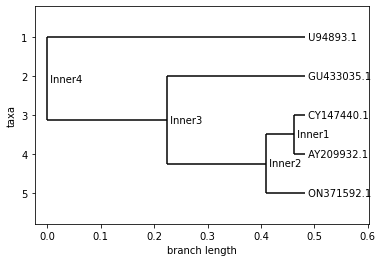

In [37]:
#read and align query sequences from the file "CoV_S_seqs.fasta" and name the alignment result as "align"
align = AlignIO.read("NA_align.txt", "fasta")

#print out the alignment result
print(align)

#calculate the distance matrix using DistanceCalculator and name as "distMatrix"
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)

#print out distance matrix result
print(distMatrix)

#create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

#Construct the phylogenetic tree using UPGMA algorithm
Tree = constructor.upgma(distMatrix)

#Draw the phylogenetic tree with phylo.draw() function
Phylo.draw(Tree)

## Analyzing the Results

** insert analysis here when you are able to complete all methods 